In [1]:
# Example 1 - Exploratory Data Analysis (EDA)

In [2]:
# We want to use Pandas and Seaborn to:
# 1. Explore a numerical dataset and create visual distributions
# 2. Identify and eliminate outliers (if any)
# 3. Uncover correlations between two datasets

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [5]:
print("Keys: ", housing.keys())

Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [6]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
print("Type  of data: ", type(housing.data))
print("Shape of data: ", housing.data.shape)

Type  of data:  <class 'numpy.ndarray'>
Shape of data:  (20640, 8)


In [8]:
print("Feature Names: ", housing.feature_names)

Feature Names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
print("Type  of target: ", type(housing.target))
print("Shape of target: ", housing.target.shape)

Type  of target:  <class 'numpy.ndarray'>
Shape of target:  (20640,)


In [10]:
california_pd = pd.DataFrame(housing.data)
california_pd.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
california_pd.columns = housing.feature_names
california_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
california_pd['Price'] = housing.target
california_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
california_pd

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [14]:
# Descriptive Statistics
california_pd.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [15]:
# Display rows with missing data
california_pd[california_pd.isnull().any(axis=1)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price


In [16]:
# Count the number of missing values for each column
total = california_pd.isnull().sum().sort_values(ascending=False)
percent = (california_pd.isnull().sum()/california_pd.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, 
                         keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MedInc,0,0.0
HouseAge,0,0.0
AveRooms,0,0.0
AveBedrms,0,0.0
Population,0,0.0
AveOccup,0,0.0
Latitude,0,0.0
Longitude,0,0.0
Price,0,0.0


In [17]:
# Count the number of non-missing data
california_pd.notna().sum()

MedInc        20640
HouseAge      20640
AveRooms      20640
AveBedrms     20640
Population    20640
AveOccup      20640
Latitude      20640
Longitude     20640
Price         20640
dtype: int64

In [18]:
# Drop missing values
california_pd = california_pd.dropna()
california_pd.shape

(20640, 9)

In [19]:
# Fill missing values with mean value (if any)
california_pd.fillna(california_pd.mean(), inplace = True)

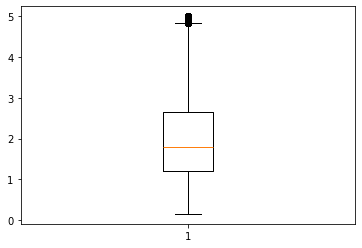

In [20]:
# Box Plots - useful for outlier detection
plt.boxplot(list(california_pd.Price)); 
plt.show(); 

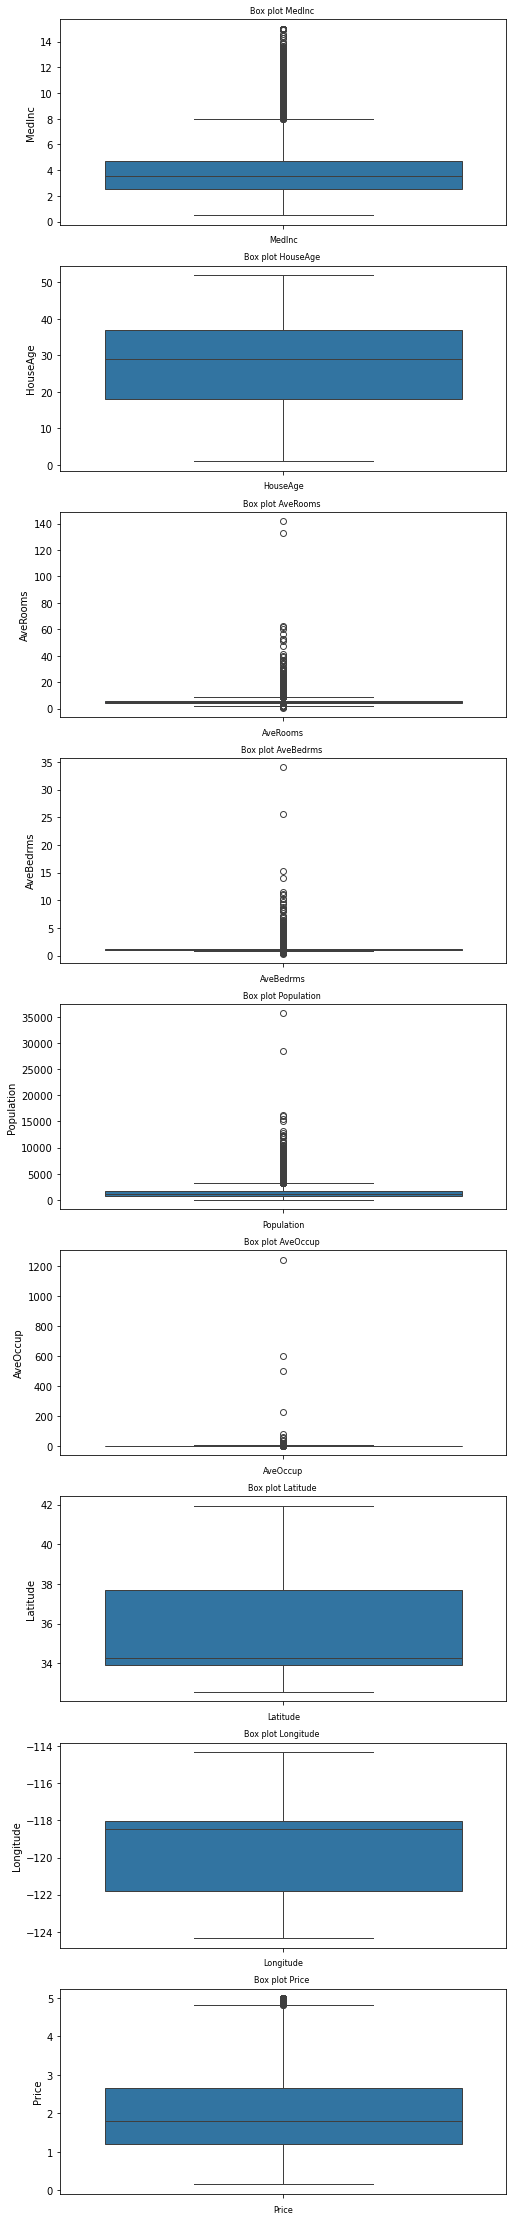

In [21]:
# Box Plots for all columns
fig,  ax = plt.subplots(len(list(california_pd.columns)), figsize=(8,40))

for i, feature_name in enumerate(list(california_pd.columns)):
    sns.boxplot(y=california_pd[feature_name], ax=ax[i]);
    ax[i].set_xlabel(feature_name, fontsize=8);
    ax[i].set_title("Box plot {} ".format(feature_name), fontsize=8);

plt.show();

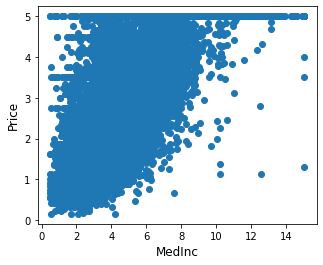

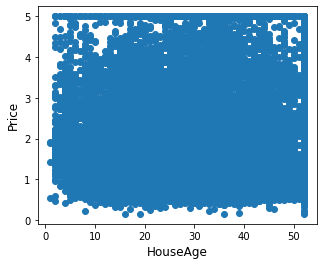

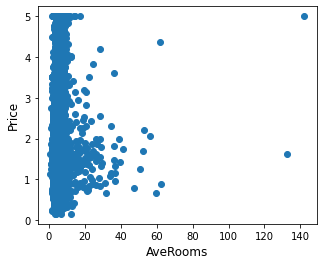

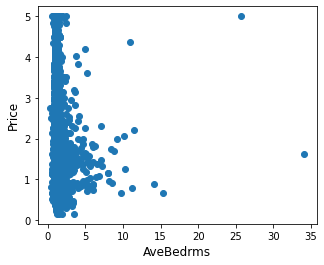

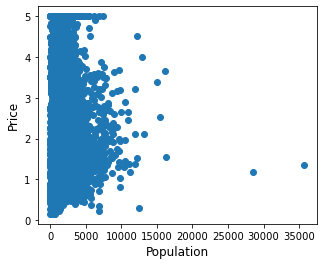

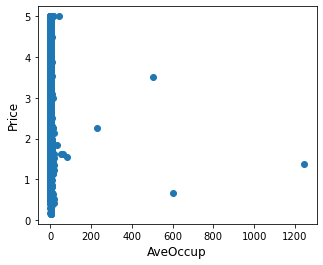

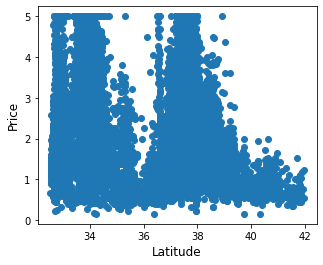

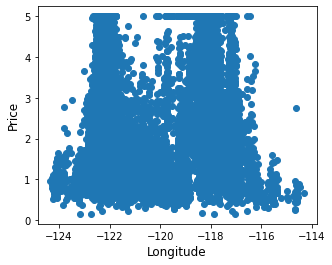

In [22]:
# Scatterplot - useful for outlier detection
for feature_name in housing.feature_names:
    plt.figure(figsize=(5, 4));
    plt.scatter(california_pd[feature_name], california_pd['Price']);
    plt.ylabel('Price', size=12);
    plt.xlabel(feature_name, size=12);
    
plt.show();

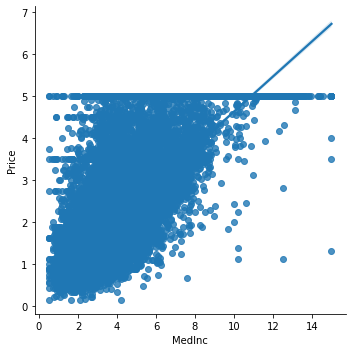

In [23]:
sns.lmplot(x = 'MedInc', y = 'Price', data = california_pd)

In [24]:
# Interquartile Range (IQR) - measure of statistical dispersion, the difference between 75th and 25th percentiles
Q1 = california_pd.quantile(0.25)
Q3 = california_pd.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MedInc          2.179850
HouseAge       19.000000
AveRooms        1.611665
AveBedrms       0.093447
Population    938.000000
AveOccup        0.852520
Latitude        3.780000
Longitude       3.790000
Price           1.451250
dtype: float64


In [25]:
# Remove outliers based on IQR
california_outlier_IQR = california_pd[~((california_pd < (Q1 - 1.5 * IQR)) | 
                                 (california_pd > (Q3 + 1.5 * IQR))).any(axis=1)]
california_outlier_IQR.shape

(16312, 9)

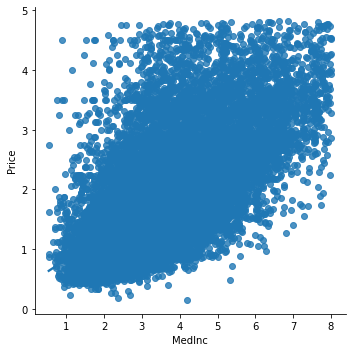

In [26]:
sns.lmplot(x = 'MedInc', y = 'Price', data = california_outlier_IQR)

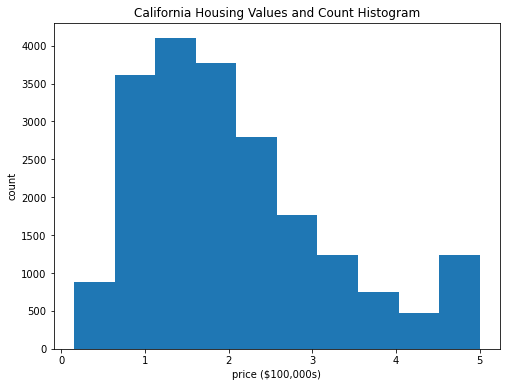

In [27]:
# Histogram
plt.figure(figsize=(8, 6));
plt.hist(california_pd['Price']);
plt.title('California Housing Values and Count Histogram');
plt.xlabel('price ($100,000s)');
plt.ylabel('count');
plt.show();

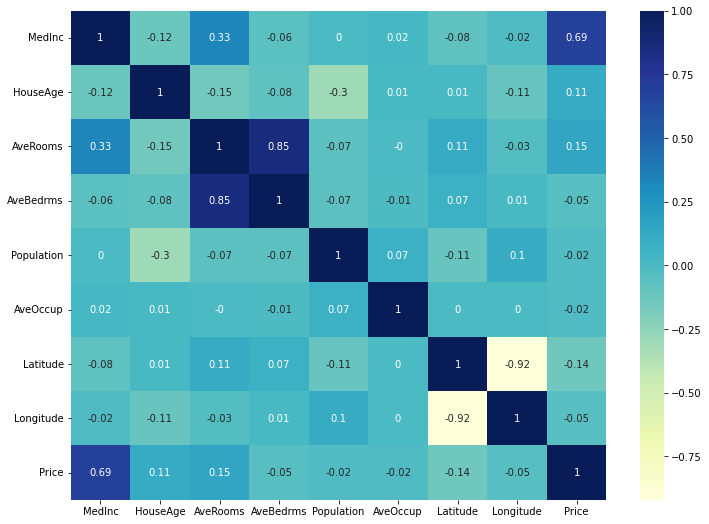

In [28]:
# Heatmap
plt.figure(figsize=(12, 9));
correlation_matrix = california_pd.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

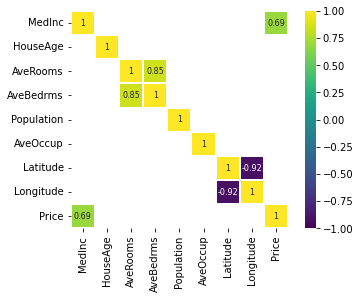

In [29]:
# Highlight high correlation
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [30]:
# Calculate correlation
import operator

individual_features_df = []
for i in range(0, len(california_pd.columns) - 1): # -1 because the last column is PRICE
    tmpDf = california_pd[[california_pd.columns[i], 'Price']]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['Price'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

       Latitude: -0.14416027687465638
      AveBedrms: -0.04670051296948669
      Longitude: -0.04596661511798295
     Population: -0.024649678888894837
       AveOccup: -0.023737412956134348
       HouseAge: 0.10562341249321122
       AveRooms: 0.1519482897414574
         MedInc: 0.6880752079585484


<ipython-input-30-eac0e8a07fa9>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_correlations = {feature.columns[0]: feature.corr()['Price'][0] for feature in individual_features_df}
